# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [11]:
#Getting the file
!wget https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/exercise05_datacollection.zip
!unzip /content/exercise05_datacollection.zip



--2022-04-24 13:17:35--  https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/exercise05_datacollection.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/exercise05_datacollection.zip [following]
--2022-04-24 13:17:36--  https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/exercise05_datacollection.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366458 (358K) [application/zip]
Saving to: ‘exercise05_datacollection.zip.1’

exercise05_datacoll 100%[===================>] 357.87K  --.-KB/s    in 

In [12]:
#Reading the datasets
#Opening the training set
with open("exercise09_datacollection/stsa-train.txt") as f:
    movie_review = f.readlines()
#Opening the test set
with open("exercise09_datacollection/stsa-test.txt") as f:
    movie_review_test = f.readlines()

In [24]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Separating to dependent and independent varaibles
positive = []
comments = []
for i in range(len(movie_review)):
    positive.append(int(movie_review[i][0]))
    comments.append(movie_review[i][1:len(movie_review[i])])

    
    
#inserting to pandas data frame
reviews_df = pd.DataFrame()
reviews_df.reset_index(drop=True)
reviews_df['positive_review'] = positive
reviews_df['viewer_comments'] = comments


#converting comments to labeled data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
reviews_encoded = le.fit_transform(reviews_df['viewer_comments'])
features = list(zip(reviews_encoded))


#splitting training dataset into training and validation subsets
#The testing subset below is the validation subset
X_train, X_test, y_train, y_test = train_test_split(features,reviews_df['positive_review'], test_size=0.2)   
    

#fitting the knn
from sklearn.neighbors import KNeighborsClassifier


# Applying k = 3, for 1 or 0 classification
knn_model = KNeighborsClassifier(n_neighbors=3)

#fitting knn model with training data
knn_model.fit(X_train,y_train)

y_pred_test = knn_model.predict(X_test)
# View accuracy score
print("The accuracy")
accuracy_score(y_test, y_pred_test)
# View confusion matrix for test data and predictions
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)
#Classification report
print("Classification report")
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

The accuracy
Confusion Matrix
Classification report
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       673
           1       0.61      0.63      0.62       711

    accuracy                           0.60      1384
   macro avg       0.60      0.60      0.60      1384
weighted avg       0.60      0.60      0.60      1384



In [33]:
#Fitting the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold



dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)
# View accuracy score
print("The accuracy")
accuracy_score(y_test, y_pred_test)
# View confusion matrix for test data and predictions
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)
#Classification report
print("Classification report")
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

#Kfold
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(dt, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

The accuracy
Confusion Matrix
Classification report
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       696
           1       0.64      0.66      0.65       688

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384

Mean cross-validation score: 0.63
K-fold CV average score: 0.63


In [32]:
#Fitting a support vector machine
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold




svm = LinearSVC()
vectorizer = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(reviews_df['viewer_comments'],reviews_df['positive_review'], test_size=0.2) 


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
svm_model = svm.fit(X_train, y_train)
y_pred_test = svm_model.predict(X_test)
# View accuracy score
print("The accuracy")
accuracy_score(y_test, y_pred_test)
# View confusion matrix for test data and predictions
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)
#Classification report
print("Classification report")
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

#Kfold
scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

The accuracy
Confusion Matrix
Classification report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       696
           1       0.77      0.78      0.77       688

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384

Mean cross-validation score: 0.76
K-fold CV average score: 0.75


In [31]:
#Fitting a random forest model
# Import the model we are using
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
forest = RandomForestClassifier()
forest.fit(X_train, y_train)# Train the model on training data
# Make predictions for the test set

y_pred_test = forest.predict(X_test)
# View accuracy score
print("The accuracy")
accuracy_score(y_test, y_pred_test)
# View confusion matrix for test data and predictions
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)
#Classification report
print("Classification report")
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

#Kfold
scores = cross_val_score(forest, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(forest, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

The accuracy
Confusion Matrix
Classification report
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       673
           1       0.59      0.59      0.59       711

    accuracy                           0.58      1384
   macro avg       0.58      0.58      0.58      1384
weighted avg       0.58      0.58      0.58      1384

Mean cross-validation score: 0.57
K-fold CV average score: 0.57


Training score:  0.07839537845432432
Mean cross-validation score: 0.02
K-fold CV average score: 0.02
MSE: 0.24
RMSE: 0.49


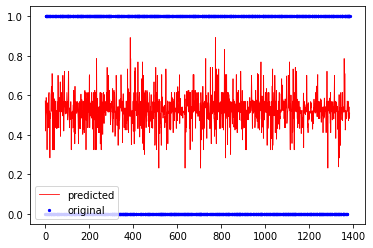

In [27]:
#Using the XGBoost model
#Instantiating XGBoost Regressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 



scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [34]:
#MultiNomial NB
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, fit_prior=True)


y_pred_test = clf.predict(X_test)
# View accuracy score
print("The accuracy")
accuracy_score(y_test, y_pred_test)
# View confusion matrix for test data and predictions
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)
#Classification report
print("Classification report")
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

#Kfold
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

The accuracy
Confusion Matrix
Classification report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       696
           1       0.79      0.82      0.80       688

    accuracy                           0.80      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.80      0.80      0.80      1384

Mean cross-validation score: 0.78
K-fold CV average score: 0.78


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
import pandas as pd

In [ ]:
!unzip -qq  Amazon.zip -d content/

replace content/Amazon_Unlocked_Mobile.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y



In [ ]:
#Write your code here.
reviews = pd.read_csv("/content/content/Amazon_Unlocked_Mobile.csv")
positive_reviews = []
positive= []
negative_reviews = []
negative= []

for i in range(len(reviews)):
    if reviews["Rating"][i] >= 3:
        positive_reviews.append(reviews["Reviews"][i])
        positive.append(1)
    else:
        negative_reviews.append(reviews["Reviews"][i])
        negative.append(0)
        


In [ ]:
reviews.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0



Data Cleaning and preparation

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

reviews= reviews[reviews['Reviews'].notnull()].head(5000)

reviews['punctuation'] = reviews['Reviews'].str.replace('[^\w\s].#','')#eliminatng punctuatiions
from nltk.corpus import stopwords
import nltk 
stop = stopwords.words('english')
reviews['stopwords'] =reviews['punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))#eliminatng stopwords 
reviews['numerics']=reviews['stopwords'].str.replace('[0-9]','')#eliminatng numercis
reviews['lowercase'] =reviews['numerics'].apply(lambda x: " ".join(x.lower() for x in x.split()))#to lowercase
from nltk.stem import PorterStemmer# for Stemming 
stemmer = PorterStemmer()
reviews['stemming']=reviews['lowercase'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
#Lemmatizing
from textblob import Word
reviews['cleaned_data'] = reviews['stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews['cleaned_data']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


0       i feel lucki found use (phone u & use hard all...
1       nice phone, nice grade pantach revue. veri cle...
2                                               veri plea
3         it work good goe slow sometim good phone i love
4       great phone replac lost phone. the thing volum...
                              ...                        
4995    thi review product may find everywher www worl...
4996    the product good structure. i'm still use braz...
4997    the iphon fine. it work good condit one major ...
4998                           screen crack realli quick.
4999    will never buy anyth again. i receiv work. nei...
Name: cleaned_data, Length: 5000, dtype: object

Vectorizing the data

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


vector = TfidfVectorizer()
tfidf = vector.fit_transform(reviews['cleaned_data'].values)


K means model 

In [ ]:

from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters = 5,random_state=99) #Defining k means model
kmodel.fit(tfidf)
labels_kmeans = kmodel.labels_ #Creating labels 
cluster_center_kmeans=kmodel.cluster_centers_ #Defining tcluster center
terms = vector.get_feature_names()
terms[1:10]
reviews['Label'] = kmodel.labels_
reviews

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,punctuation,stopwords,numerics,lowercase,stemming,cleaned_data,Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used (phone...,I feel LUCKY found used (phone us & used hard ...,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucki found use (phone us & use hard al...,i feel lucki found use (phone u & use hard all...,3
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. very cle...","nice phone, nice grade pantach revue. veri cle...","nice phone, nice grade pantach revue. veri cle...",3
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,very pleased,veri pleas,veri plea,3
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,Great phone replace lost phone. The thing volu...,Great phone replace lost phone. The thing volu...,great phone replace lost phone. the thing volu...,great phone replac lost phone. the thing volum...,great phone replac lost phone. the thing volum...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0,This review is not for the product as you may ...,This review product may find everywhere www wo...,This review product may find everywhere www wo...,this review product may find everywhere www wo...,thi review product may find everywher www worl...,thi review product may find everywher www worl...,3
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0,The product was in good structure. I'm still n...,The product good structure. I'm still use Braz...,The product good structure. I'm still use Braz...,the product good structure. i'm still use braz...,the product good structure. i'm still use braz...,the product good structure. i'm still use braz...,3
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0,The iPhone was fine. It works and is in good c...,The iPhone fine. It works good condition one m...,The iPhone fine. It works good condition one m...,the iphone fine. it works good condition one m...,the iphon fine. it work good condit one major ...,the iphon fine. it work good condit one major ...,3
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0,Screen cracked really quick.,Screen cracked really quick.,Screen cracked really quick.,screen cracked really quick.,screen crack realli quick.,screen crack realli quick.,3


In [ ]:
#Finding top terms
print("Top terms:")
#Defing the centroid model
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
#Creating the loop for finding the top words
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()

Top terms:
Cluster 0: excel
 excelent
 product
 condit
 recommend
Cluster 1: good
 veri
 phone
 it
 product
Cluster 2: great
 work
 phone
 product
 price
Cluster 3: phone
 it
 work
 the
 good
Cluster 4: love
 it
 phone
 great
 daughter



DBscan Clustering

In [ ]:

from sklearn.cluster import DBSCAN
points = 2 * 100
def lower_b(nums, targ): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= targ:
            r = mid - 1
        else:
            l = mid + 1
    return l
def com_200th_near_tneigh(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_b(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]
import numpy as np
sent_vectors = []; 
for sent in reviews['Reviews']: 
    sent_vec = np.zeros(100) 
    words =0; 
    for word in sent: 
        try:
            vec = tfidf.wv[word]
            sent_vec += vec
            words += 1
        except:
            pass
    sent_vec /= words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape
points = 2 * 100
model = DBSCAN(eps = 1, min_samples = points, n_jobs=-1)
model.fit(sent_vectors)
reviews['AVG Cluster Label'] = model.labels_
reviews


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,punctuation,stopwords,numerics,lowercase,stemming,cleaned_data,Label,AVG Clus Label,AVG Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used (phone...,I feel LUCKY found used (phone us & used hard ...,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucki found use (phone us & use hard al...,i feel lucki found use (phone u & use hard all...,3,0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. very cle...","nice phone, nice grade pantach revue. veri cle...","nice phone, nice grade pantach revue. veri cle...",3,0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,very pleased,veri pleas,veri plea,3,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,1,0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,Great phone replace lost phone. The thing volu...,Great phone replace lost phone. The thing volu...,great phone replace lost phone. the thing volu...,great phone replac lost phone. the thing volum...,great phone replac lost phone. the thing volum...,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0,This review is not for the product as you may ...,This review product may find everywhere www wo...,This review product may find everywhere www wo...,this review product may find everywhere www wo...,thi review product may find everywher www worl...,thi review product may find everywher www worl...,3,0,0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0,The product was in good structure. I'm still n...,The product good structure. I'm still use Braz...,The product good structure. I'm still use Braz...,the product good structure. i'm still use braz...,the product good structure. i'm still use braz...,the product good structure. i'm still use braz...,3,0,0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0,The iPhone was fine. It works and is in good c...,The iPhone fine. It works good condition one m...,The iPhone fine. It works good condition one m...,the iphone fine. it works good condition one m...,the iphon fine. it work good condit one major ...,the iphon fine. it work good condit one major ...,3,0,0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0,Screen cracked really quick.,Screen cracked really quick.,Screen cracked really quick.,screen cracked really quick.,screen crack realli quick.,screen crack realli quick.,3,0,0


In [ ]:
for i in range(5):
    print("5 reviews of ensured to cluster ", i)
    print("-" * 70)
    print(reviews.iloc[reviews.groupby(['Label']).groups[i][0]]['cleaned_data'])
    print('\n')
    print(reviews.iloc[reviews.groupby(['Label']).groups[i][5]]['cleaned_data'])
    print('\n')
    print("_" * 70)

    


5 reviews of ensured to cluster  0
----------------------------------------------------------------------
excel product perfect condit


excelent


______________________________________________________________________
5 reviews of ensured to cluster  1
----------------------------------------------------------------------
it work good goe slow sometim good phone i love


good cell


______________________________________________________________________
5 reviews of ensured to cluster  2
----------------------------------------------------------------------
phone good littl slow phone old great phone temporari right now. thank great deal


great phone.


______________________________________________________________________
5 reviews of ensured to cluster  3
----------------------------------------------------------------------
i feel lucki found use (phone u & use hard all), phone line someon upgrad sold one. my son like old one final fell apart .+ year want upgrade!! thank seller, re


Hierarchical clustering Model

In [ ]:

from sklearn.cluster import AgglomerativeClustering
#Defining model
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
Agg=cluster.fit_predict(sent_vectors)
#assigning Labels 
aggdf = reviews
aggdf['AVG Cluster Label'] = cluster.labels_
aggdf.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,punctuation,stopwords,numerics,lowercase,stemming,cleaned_data,Label,AVG Clus Label,AVG Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used (phone...,I feel LUCKY found used (phone us & used hard ...,I feel LUCKY found used (phone us & used hard ...,i feel lucky found used (phone us & used hard ...,i feel lucki found use (phone us & use hard al...,i feel lucki found use (phone u & use hard all...,3,0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"nice phone, nice up grade from my pantach revu...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. Very cle...","nice phone, nice grade pantach revue. very cle...","nice phone, nice grade pantach revue. veri cle...","nice phone, nice grade pantach revue. veri cle...",3,0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,very pleased,veri pleas,veri plea,3,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,1,0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone. The only...,Great phone replace lost phone. The thing volu...,Great phone replace lost phone. The thing volu...,great phone replace lost phone. the thing volu...,great phone replac lost phone. the thing volum...,great phone replac lost phone. the thing volum...,3,0,0


In [ ]:
aggdf.groupby(['Label'])['cleaned_data'].count()

Label
0     206
1     197
2     259
3    4134
4     204
Name: cleaned_data, dtype: int64

In [ ]:

for index in range(5):
    print("Review", index)
    print("-" * 100)
    print(aggdf.iloc[aggdf.groupby(['Label']).groups[index][0]]['cleaned_data'])
    print('\n')
    print(aggdf.iloc[aggdf.groupby(['Label']).groups[index][1]]['cleaned_data'])
    print('\n')
    print("_" * 100)

Review 0
----------------------------------------------------------------------------------------------------
excel product perfect condit


excel


____________________________________________________________________________________________________
Review 1
----------------------------------------------------------------------------------------------------
it work good goe slow sometim good phone i love


good condit work good


____________________________________________________________________________________________________
Review 2
----------------------------------------------------------------------------------------------------
phone good littl slow phone old great phone temporari right now. thank great deal


phone work great. no problem


____________________________________________________________________________________________________
Review 3
----------------------------------------------------------------------------------------------------
i feel lucki found use (phone

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)





```
K-means algorithm performs best
for this dataset because the size of data is large 
the computational time is taking too long execute. By
creating clusters k-means has been the best and the top terms in 
each cluster were generated accurately. DBSCAN approach performance 
was not as good as K-means most of the reviews were grouped to a particular 
cluster. Hierarchial clustering perfomed well in categorizing and dividing 
the data evenly.

```

